In [ ]:
from google.colab import files
file=files.upload()

Saving House_Rent_Dataset.zip to House_Rent_Dataset.zip


In [ ]:
# Array
import numpy as np

# DataFrame
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Data Import
house_c=pd.read_csv("House_Rent_Dataset.zip",compression='zip')

# Data Copy
house=house_c.copy()

# Data
house.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [ ]:
# Info
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [ ]:
# Changing Data Types
cat=house.select_dtypes(exclude=[np.number])

for i in list(cat.columns):
  house[i]=house[i].astype('category')

# Info
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Posted On          4746 non-null   category
 1   BHK                4746 non-null   int64   
 2   Rent               4746 non-null   int64   
 3   Size               4746 non-null   int64   
 4   Floor              4746 non-null   category
 5   Area Type          4746 non-null   category
 6   Area Locality      4746 non-null   category
 7   City               4746 non-null   category
 8   Furnishing Status  4746 non-null   category
 9   Tenant Preferred   4746 non-null   category
 10  Bathroom           4746 non-null   int64   
 11  Point of Contact   4746 non-null   category
dtypes: category(8), int64(4)
memory usage: 300.1 KB


In [ ]:
# Checking Null Values
house.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [ ]:
# Statistical Description
house.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [ ]:
# Dropping Non Required Column
house.drop('Posted On',axis=1,inplace=True)

In [ ]:
cat.columns

Index(['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Point of Contact'],
      dtype='object')

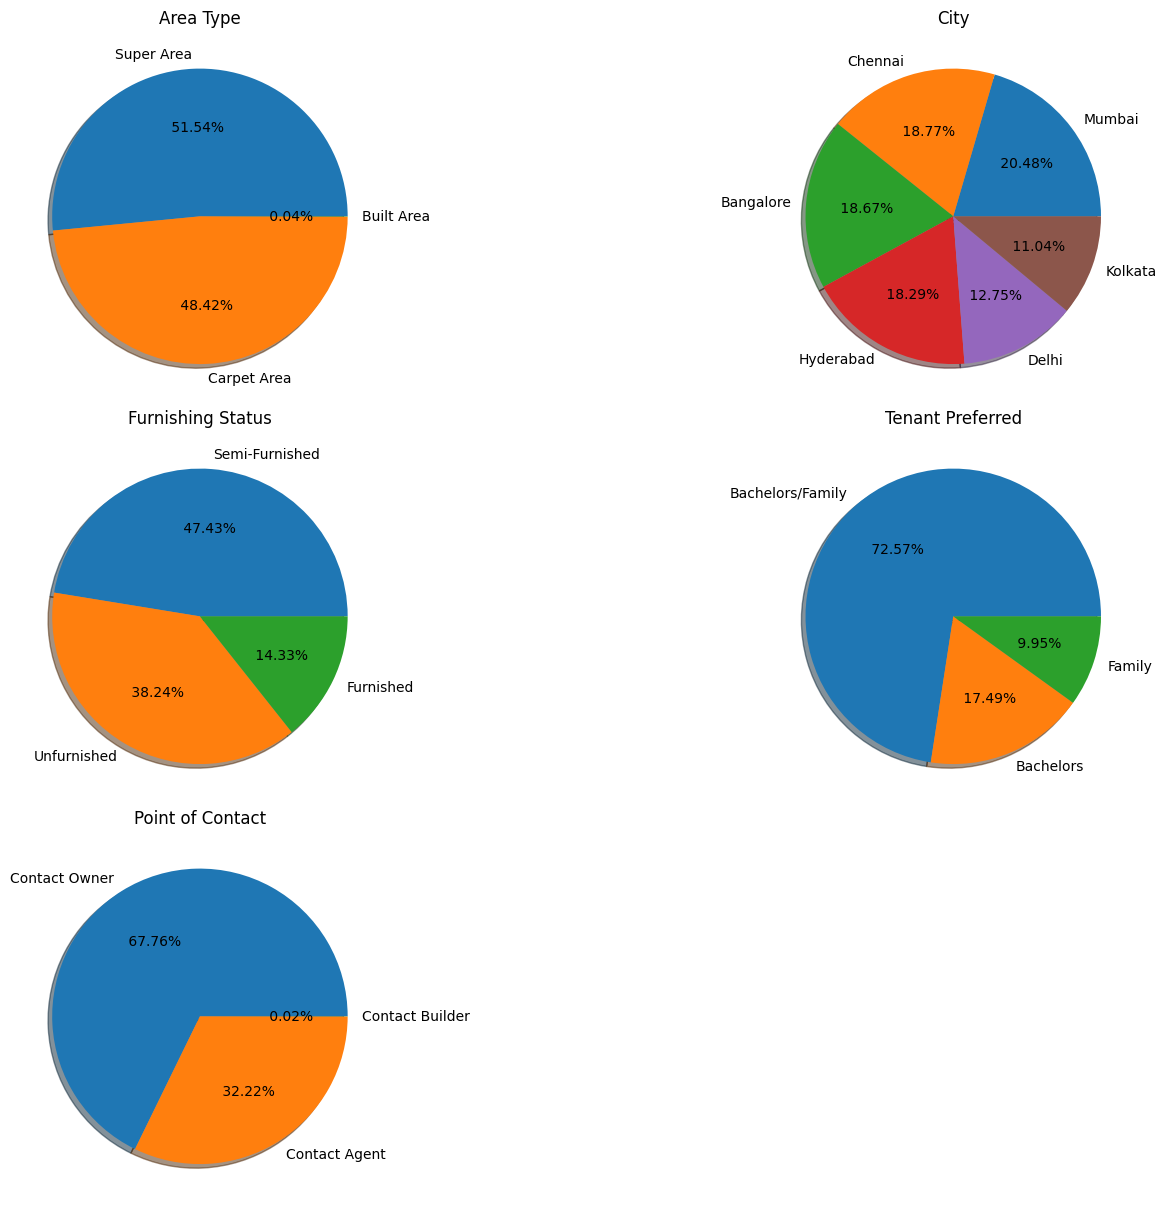

In [ ]:
lst=['Area Type', 'City','Furnishing Status', 'Tenant Preferred', 'Point of Contact']
plt.figure(figsize=(15,12),layout='constrained')
for i in range(len(lst)):
  plt.subplot(3,2,i+1)
  a=house[lst[i]].value_counts()
  lbl=a.index
  plt.title(lst[i])
  plt.pie(x=a,labels=lbl,autopct='% .2f%%',shadow=True)
plt.show()
  

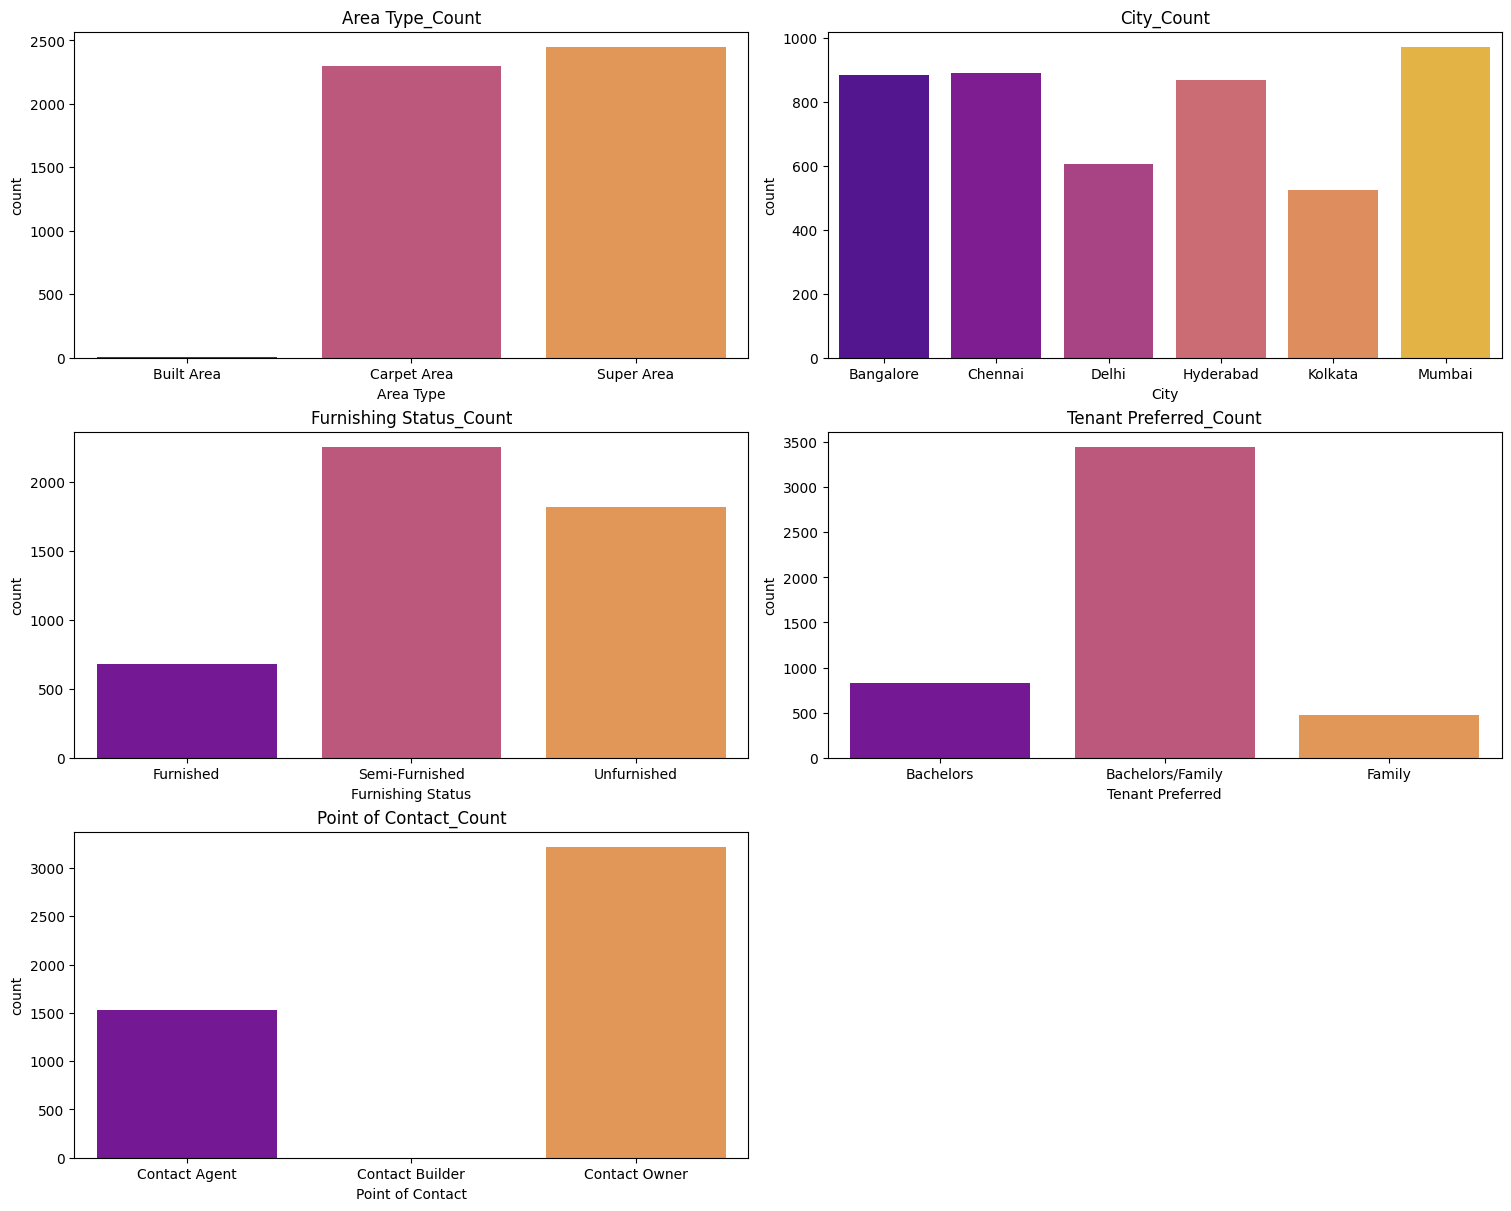

In [ ]:
lst=['Area Type', 'City','Furnishing Status', 'Tenant Preferred', 'Point of Contact']
plt.figure(figsize=(15,12),layout='constrained')
for i in range(len(lst)):
  plt.subplot(3,2,i+1)
  plt.title(lst[i]+"_Count",loc='center')
  plt.xlabel(lst[i])
  sns.countplot(data=house,x=lst[i],palette='plasma',)
plt.show()

**Complete Dashboard**
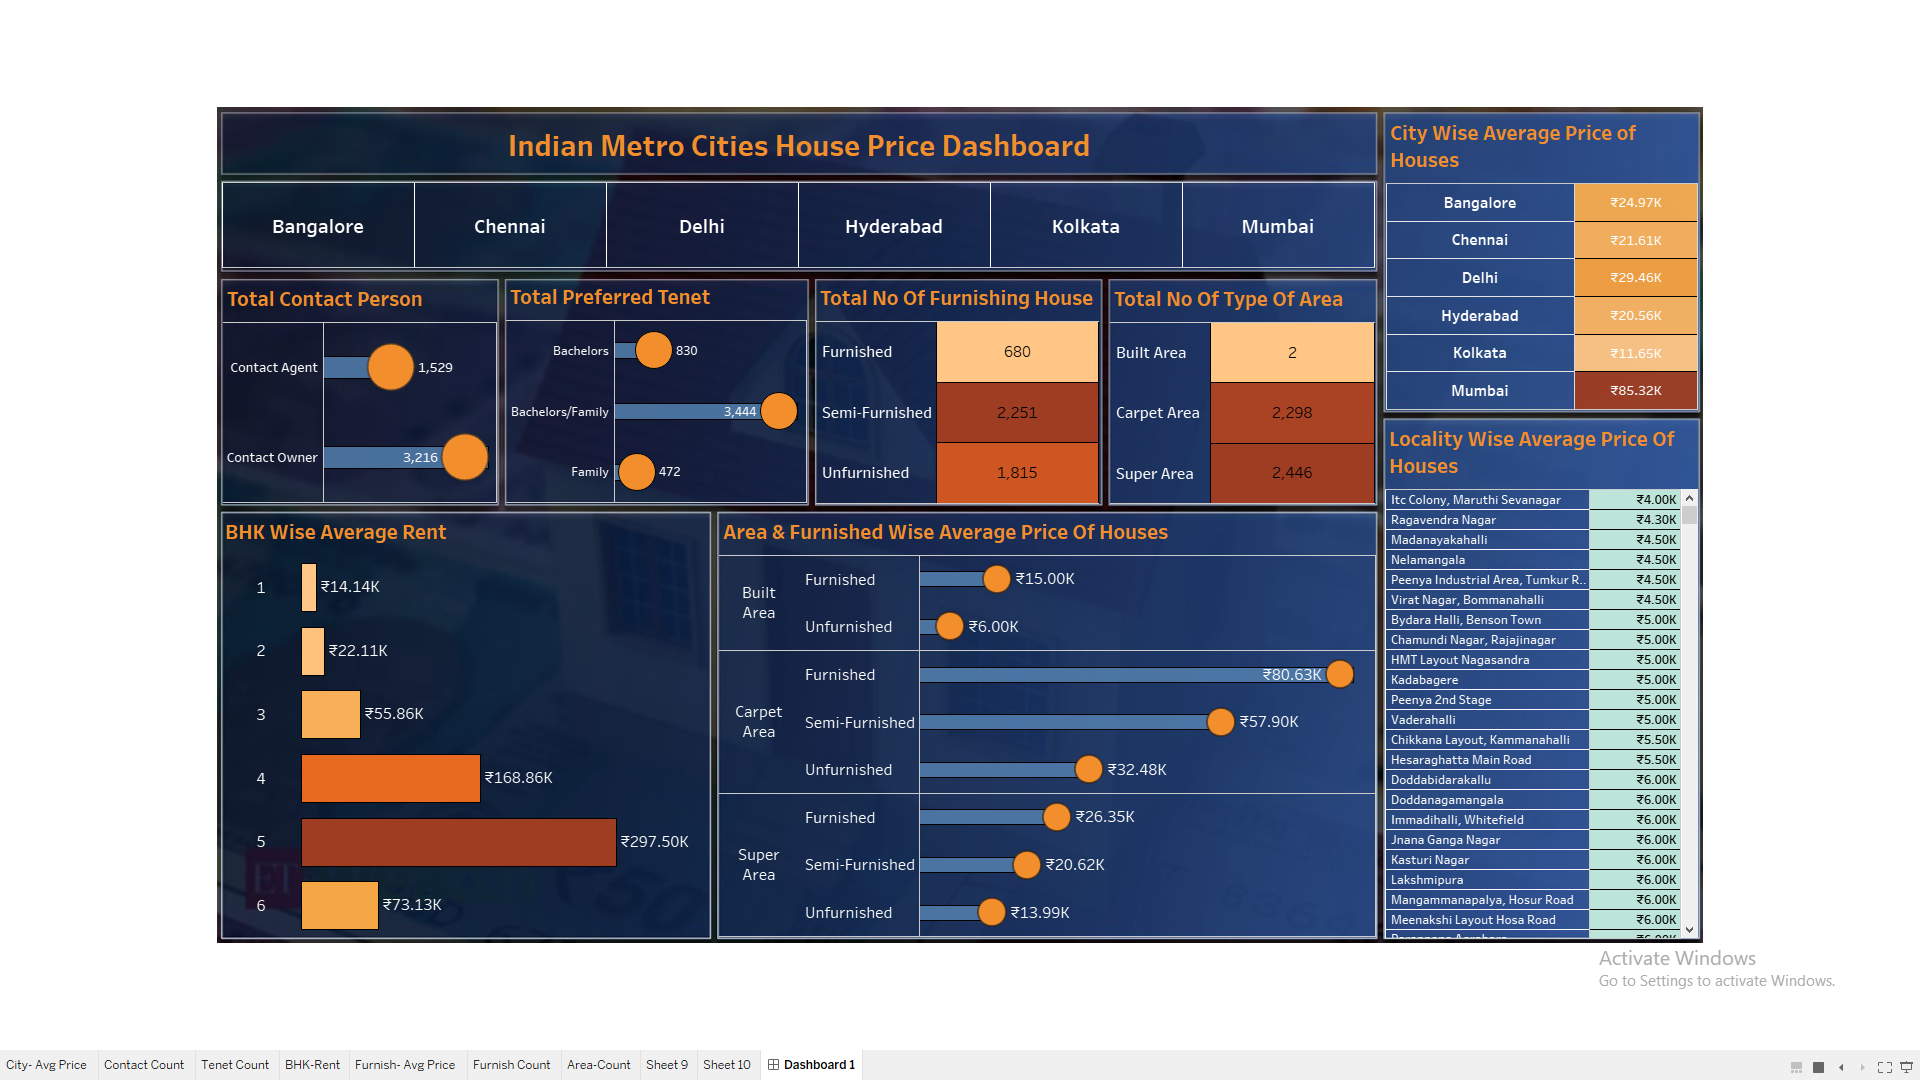

In [ ]:
# Preprocessing
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

#Gridsearch
from sklearn.model_selection import GridSearchCV,train_test_split,KFold,cross_val_score,cross_val_predict

#Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

#Metrics
from sklearn.metrics import mean_squared_error,r2_score

#Pipeline
from sklearn.pipeline import Pipeline

In [ ]:
# Label Encoding
cat=house.select_dtypes(exclude=[np.number])
for i in list(cat.columns):
  house[i+"_encoder"]=LabelEncoder().fit_transform(house[i])

In [ ]:
#Scaling
scl_d=house.select_dtypes(include=[np.number])
scl=pd.DataFrame(MinMaxScaler().fit_transform(scl_d.to_numpy()),columns=scl_d.columns)
scl.head()

,BHK,Rent,Size,Bathroom,Floor_encoder,Area Type_encoder,Area Locality_encoder,City_encoder,Furnishing Status_encoder,Tenant Preferred_encoder,Point of Contact_encoder
0,0.2,0.002515,0.136421,0.111111,0.949896,1.0,0.098926,0.8,1.0,0.5,1.0
1,0.2,0.005373,0.098874,0.000000,0.029228,1.0,0.683527,0.8,0.5,0.5,1.0
2,0.2,0.004516,0.123905,0.000000,0.029228,1.0,0.787825,0.8,0.5,0.5,1.0
3,0.2,0.002515,0.098874,0.000000,0.020877,1.0,0.235452,0.8,1.0,0.5,1.0
4,0.2,0.001801,0.105131,0.000000,0.020877,0.5,0.846016,0.8,1.0,0.0,1.0


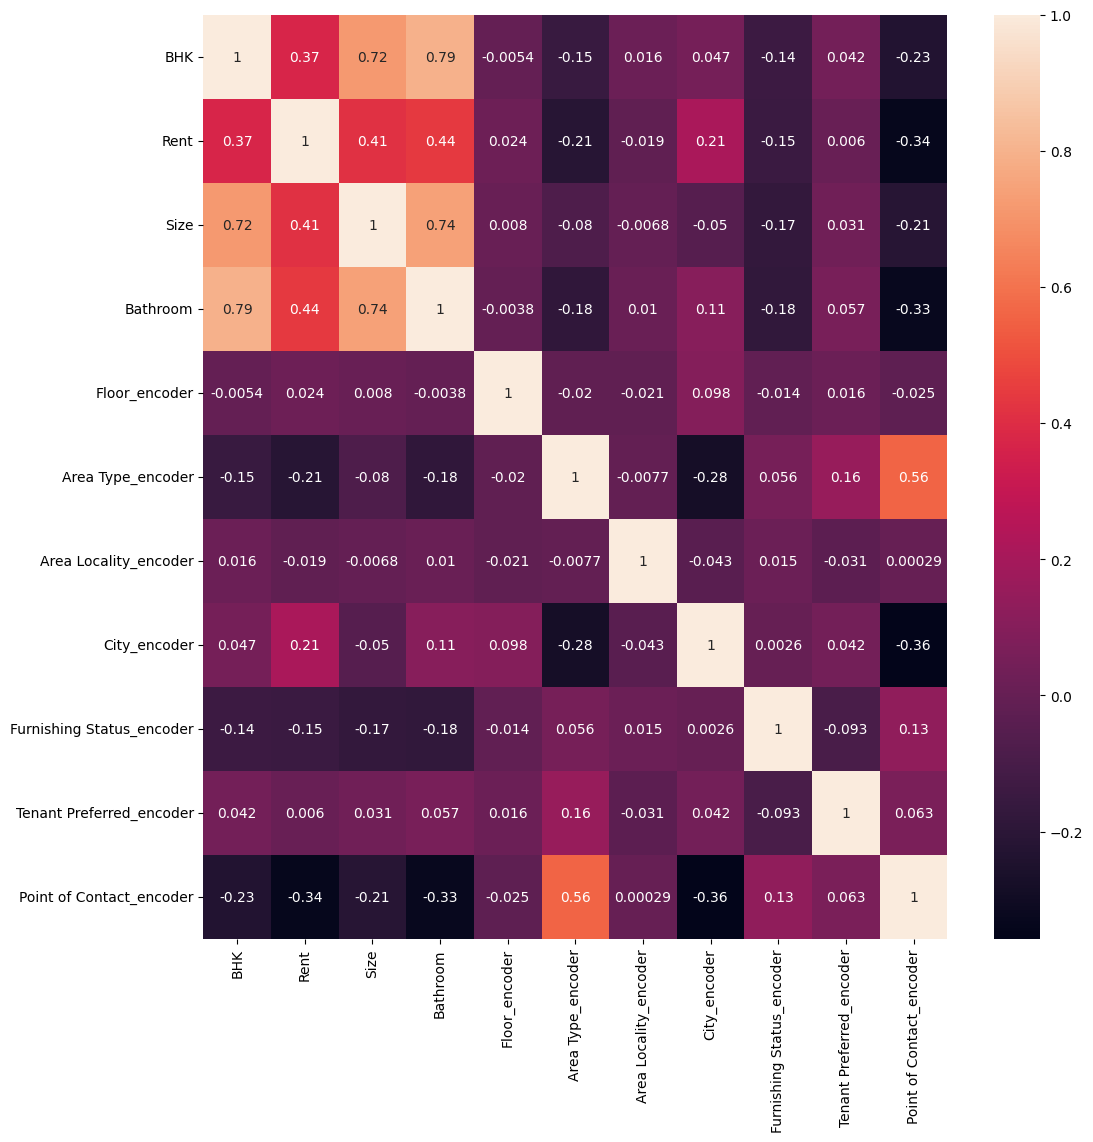

In [ ]:
# Corelation
cor=scl.corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor,annot=True)
plt.show()

In [ ]:
x=scl.drop('Rent',axis=1)
y=scl['Rent']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
# Liner Regression
def model_lin(x_train,x_test,y_train,y_test):
  global rmse_lin,r2_lin

  lin=LinearRegression()
  lin.fit(x_train,y_train)
  y_pred=lin.predict(x_test)

  rmse_lin=mean_squared_error(y_test,y_pred,squared=False)
  r2_lin=r2_score(y_test,y_pred)
  scr_lin=lin.score(x_train,y_train)

  print("************Linear Regression************")
  print("\n")
  print("Training R2 Score: ",scr_lin)
  print("Testing R2 Score: ",r2_lin)
  print("RMSE: ",rmse_lin)
  print("\n")

# Decision Tree
def model_dt(x_train,x_test,y_train,y_test):
  global rmse_dt,r2_dt

  lin=DecisionTreeRegressor()
  lin.fit(x_train,y_train)
  y_pred=lin.predict(x_test)

  rmse_dt=mean_squared_error(y_test,y_pred,squared=False)
  r2_dt=r2_score(y_test,y_pred)
  scr_dt=lin.score(x_train,y_train)

  print("************Decision Tree************")
  print("\n")
  print("Training R2 Score: ",scr_dt)
  print("Testing R2 Score: ",r2_dt)
  print("RMSE: ",rmse_dt)
  print("\n")

# Random Forest
def model_rf(x_train,x_test,y_train,y_test):
  global rmse_rf,r2_rf

  lin=RandomForestRegressor()
  lin.fit(x_train,y_train)
  y_pred=lin.predict(x_test)

  rmse_rf=mean_squared_error(y_test,y_pred,squared=False)
  r2_rf=r2_score(y_test,y_pred)
  scr_rf=lin.score(x_train,y_train)

  print("************Random Forest************")
  print("\n")
  print("Training R2 Score: ",scr_rf)
  print("Testing R2 Score: ",r2_rf)
  print("RMSE: ",rmse_rf)
  print("\n")


# Adaptive Boosting
def model_ab(x_train,x_test,y_train,y_test):
  global rmse_ab,r2_ab

  lin=AdaBoostRegressor()
  lin.fit(x_train,y_train)
  y_pred=lin.predict(x_test)

  rmse_ab=mean_squared_error(y_test,y_pred,squared=False)
  r2_ab=r2_score(y_test,y_pred)
  scr_ab=lin.score(x_train,y_train)

  print("************Adaptive Boosting************")
  print("\n")
  print("Training R2 Score: ",scr_ab)
  print("Testing R2 Score: ",r2_ab)
  print("RMSE: ",rmse_ab)
  print("\n")

# KNN
def model_knn(x_train,x_test,y_train,y_test):
  global rmse_knn,r2_knn

  lin=KNeighborsRegressor()
  lin.fit(x_train,y_train)
  y_pred=lin.predict(x_test)

  rmse_knn=mean_squared_error(y_test,y_pred,squared=False)
  r2_knn=r2_score(y_test,y_pred)
  scr_knn=lin.score(x_train,y_train)

  print("************K Nearest Neighbour************")
  print("\n")
  print("Training R2 Score: ",scr_knn)
  print("Testing R2 Score: ",r2_knn)
  print("RMSE: ",rmse_knn)
  print("\n")

In [ ]:
# Model Evaluation
model_lin(x_train,x_test,y_train,y_test)
model_dt(x_train,x_test,y_train,y_test)
model_rf(x_train,x_test,y_train,y_test)
model_ab(x_train,x_test,y_train,y_test)
model_knn(x_train,x_test,y_train,y_test)

************Linear Regression************


Training R2 Score:  0.2336315784058931
Testing R2 Score:  0.4769277942651482
RMSE:  0.012262890371033584


************Decision Tree************


Training R2 Score:  0.9999721377848554
Testing R2 Score:  -1.6474737892451876
RMSE:  0.027588485397629276


************Random Forest************


Training R2 Score:  0.8927078125349037
Testing R2 Score:  -0.32860070728775015
RMSE:  0.019543811423876033


************Adaptive Boosting************


Training R2 Score:  0.6386005585496799
Testing R2 Score:  0.1401559319754282
RMSE:  0.015722509781911413


************K Nearest Neighbour************


Training R2 Score:  0.41732123141548694
Testing R2 Score:  0.3806710529791739
RMSE:  0.013343590744250169




In [ ]:
# Compairing the results
tbl=pd.DataFrame()
tbl['Models']=["Linear Regression","Decision Tree","Random Forest","Adaptive Boosting","K Nearest Neighbour"]
tbl['R2_Score']=[r2_lin,r2_dt,r2_rf,r2_ab,r2_knn]
tbl['RMSE']=[rmse_lin,rmse_dt,rmse_rf,rmse_ab,rmse_knn]
tbl.set_index('Models',inplace=True)
tbl.sort_values('RMSE')

,R2_Score,RMSE
Models,,
Linear Regression,0.476928,0.012263
K Nearest Neighbour,0.380671,0.013344
Adaptive Boosting,0.140156,0.015723
Random Forest,-0.328601,0.019544
Decision Tree,-1.647474,0.027588



 LinearRegression()
r2-Score(train): mean= (0.349), min=(0.095)) ,max= (0.480), stdev= (0.135)
r2-Score(test): 0.2261

 DecisionTreeRegressor()
r2-Score(train): mean= (-1.430), min=(-4.743)) ,max= (0.390), stdev= (2.142)
r2-Score(test): -1.1629

 RandomForestRegressor()
r2-Score(train): mean= (0.219), min=(-0.549)) ,max= (0.682), stdev= (0.439)
r2-Score(test): 0.2311

 AdaBoostRegressor()
r2-Score(train): mean= (0.239), min=(0.043)) ,max= (0.478), stdev= (0.156)
r2-Score(test): 0.1848

 KNeighborsRegressor()
r2-Score(train): mean= (0.289), min=(-0.163)) ,max= (0.620), stdev= (0.292)
r2-Score(test): 0.1817


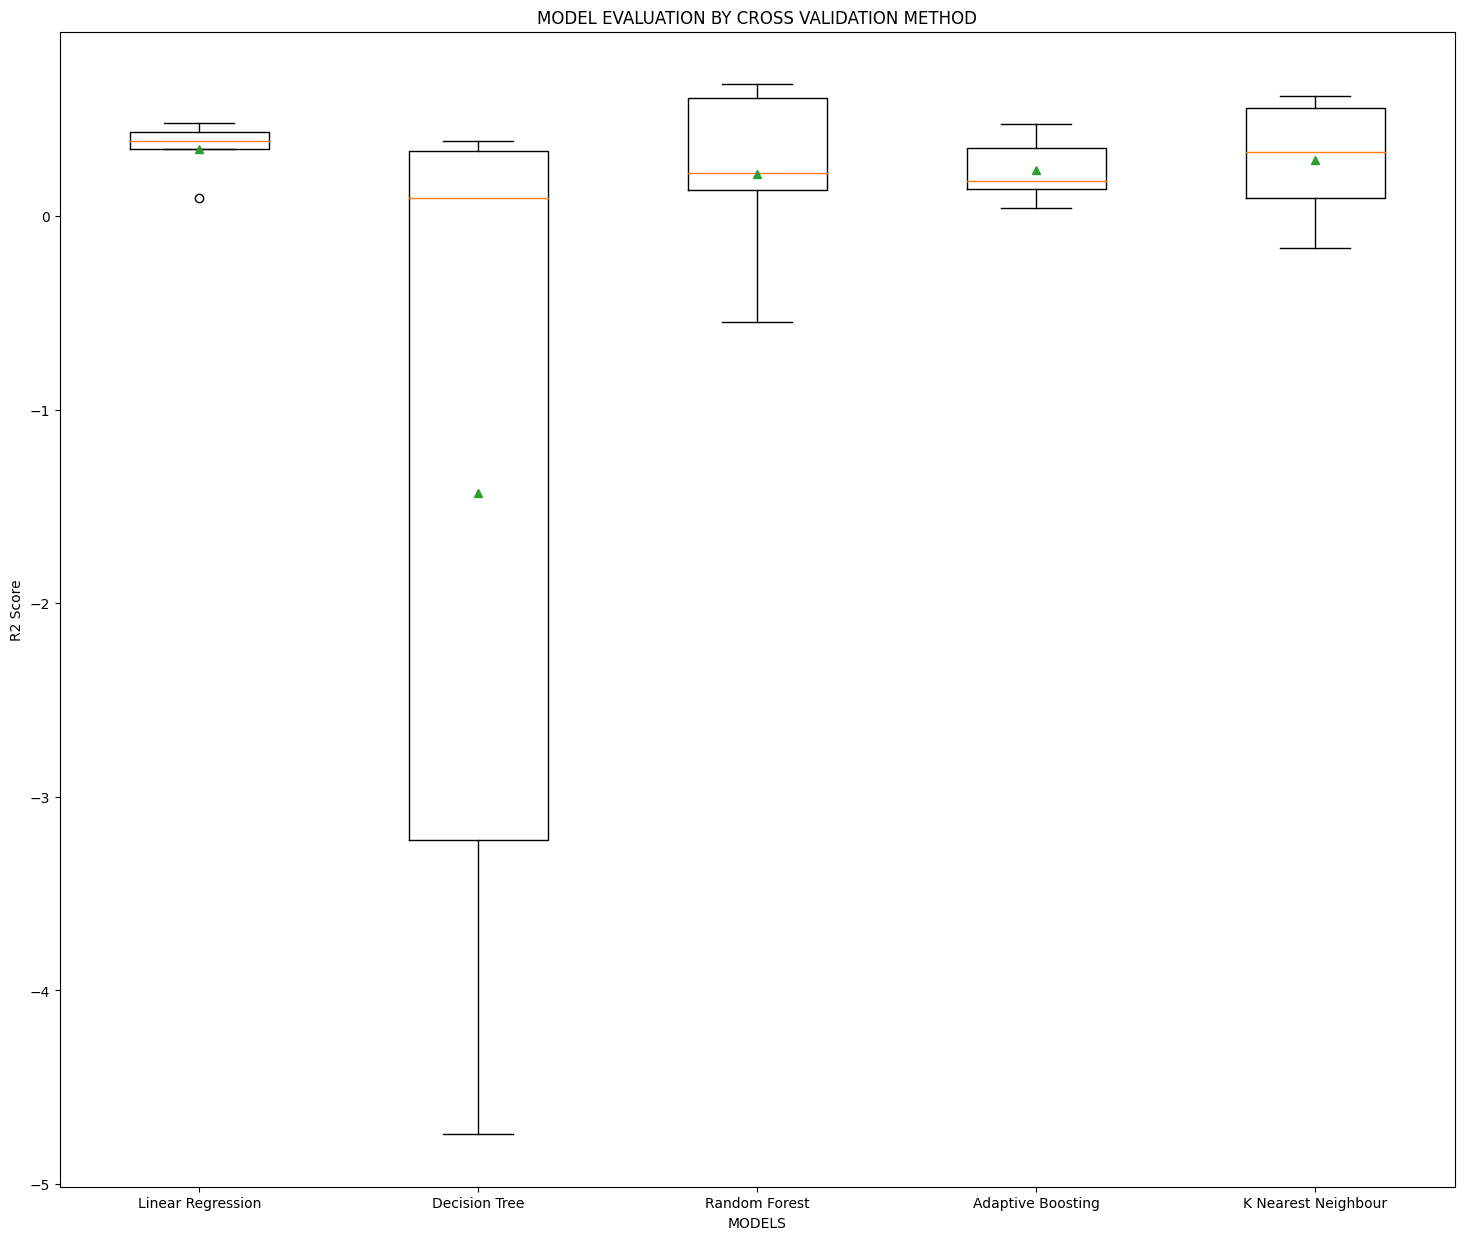

In [ ]:
# Using cross validation method to avoid overfitting
import statistics as st
###############################################################################
# Model building
lin =LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
knn=KNeighborsRegressor()
ab=AdaBoostRegressor()
m  =[lin,dt,rf,ab,knn]
model_name=["Linear Regression","Decision Tree","Random Forest","Adaptive Boosting","K Nearest Neighbour"]

results, mean_results, p, r2_test=list(),list(),list(),list()

################################################################################
#Model fitting,cross-validating and evaluating performance

def algor(model):
  print('\n',i)
  pipe=Pipeline([('model',model)])
  pipe.fit(x_train,y_train)
  cv=KFold(n_splits=5)
  n_scores=cross_val_score(pipe,x_train,y_train,scoring='r2',cv=cv,n_jobs=-1,error_score='raise')
  results.append(n_scores)
  mean_results.append(st.mean(n_scores))
  print('r2-Score(train): mean= (%.3f), min=(%.3f)) ,max= (%.3f), stdev= (%.3f)'%(st.mean(n_scores), min(n_scores), max(n_scores),np.std(n_scores)))
  y_pred=cross_val_predict(model,x_train,y_train,cv=cv)
  p.append(y_pred)
  r2=r2_score(y_train,y_pred)
  r2_test.append(r2)
  print('r2-Score(test): %.4f'%(r2))

for i in m:
  algor(i)

###############################################################################
# Model comparison By Visualizing 

fig=plt.subplots(figsize=(18,15))
plt.title('MODEL EVALUATION BY CROSS VALIDATION METHOD')
plt.xlabel('MODELS')
plt.ylabel('R2 Score')
plt.boxplot(results,labels=model_name,showmeans=True)
plt.show()

In [ ]:
# R2_value calculation by cross validation
lin=LinearRegression()
cv=KFold(n_splits=5)
n_scores=cross_val_score(lin,x_train,y_train,cv=cv,scoring='r2',n_jobs=-1)
y_pred=cross_val_predict(lin,x_train,y_train,cv=cv)
test_score=r2_score(y_train,y_pred)
print('Testing R2_Score: ',test_score)

Testing R2_Score:  0.22609479256020815


In [ ]:
#Rmse value calculation by cross validation
lin=LinearRegression()
cv=KFold(n_splits=5)
n_scores=cross_val_score(lin,x_train,y_train,cv=cv,scoring='neg_root_mean_squared_error',n_jobs=-1,)
y_pred=cross_val_predict(lin,x_train,y_train,cv=cv)
rmse=mean_squared_error(y_train,y_pred)
print('RMSE: ',rmse)

RMSE:  0.00045548984659490974
